In [1]:
import os
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets



In [2]:
stats.norm.rvs(10, size=10)

array([  8.73098651,  10.67137351,   9.13400411,  11.11018398,
         9.27527115,  10.68397893,   9.70891839,  11.11681653,
        10.10392229,  10.91330016])

In [17]:
import statsmodels.stats.weightstats as sm

def plot_gaussian(u=0, n=10000, sd = 1, breaks=100):
    
    #fig, ax = plt.subplots(1, 1)
    fig, ax = plt.subplots(figsize=(20,12))
    x = np.linspace(stats.norm.ppf(0.01),
                 stats.norm.ppf(0.99), 100)
    

    r = stats.norm.rvs(size=n, scale=sd).tolist()
    
    newr = [i+u for i in r]
    #newr = np.array(newr)
   
    ax.hist(r, bins=breaks, normed=True, histtype='stepfilled', color=['teal'], alpha=0.2)
    
    if u!=0:
        ax.hist(newr, bins=breaks, normed=True, histtype='stepfilled', color=['red'], alpha=0.2)
    else:
        pass
    
    ax.legend(loc='best', frameon=False)
    ax.set_ylabel('normal curve with mean $x$')
    ax.set_xlabel('$x$')
    
    result = sm.ttest_ind(r, newr)
    
    print(np.mean(newr),len(newr), np.mean(r), len(r))

    print("t = ", np.round(result[0], 3))
    print("df = ", np.round(result[2], 3))
    print("p = ", np.round(result[1], 5))
 
    ax.legend()


//anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


9.9634618149 100 -0.0365381851042 100
t =  -37.952
df =  198.0
p =  0.0


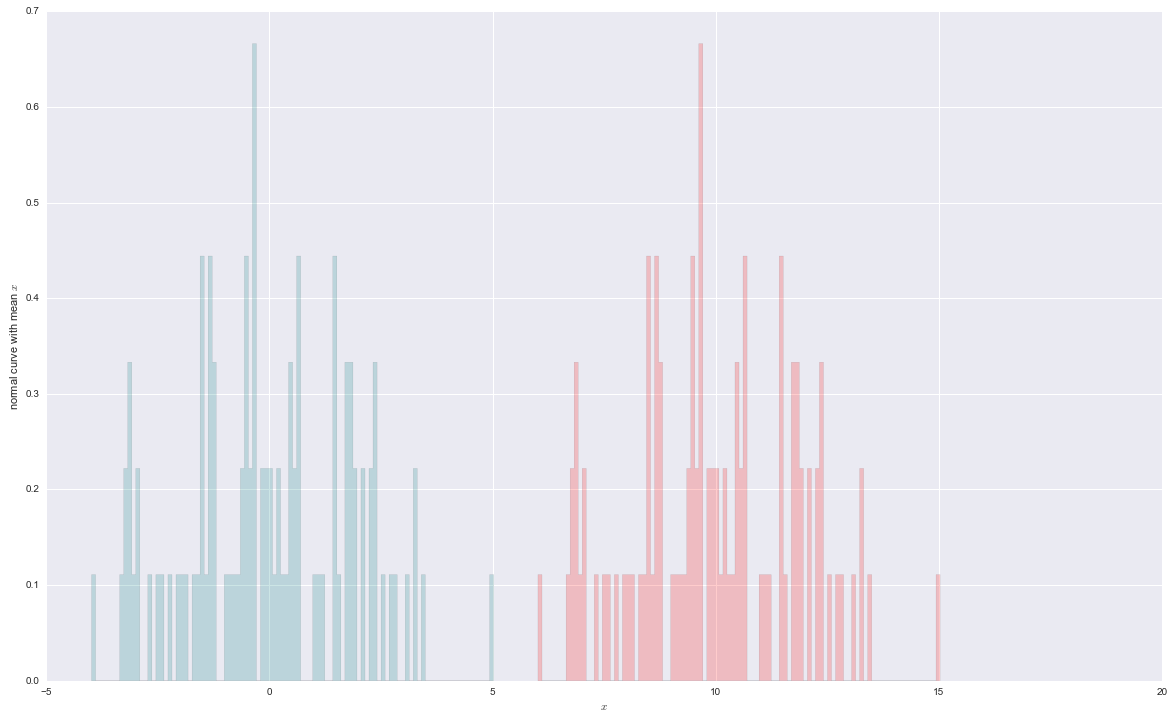

In [29]:
plot_gaussian(u = 10, sd = 2, n=100, breaks=100)

In [15]:
import statsmodels.stats.weightstats as sm

r = stats.norm.rvs(size=100)

newr = [i+1 for i in r.tolist()]
newr = np.array(newr)
   

result = sm.ttest_ind(r, newr)

print "t = ", np.round(result[0], 3)
print "df = ", np.round(result[2], 3)
print "p = ", np.round(result[1], 3)


t =  -7.289
df =  198.0
p =  0.0


In [16]:
result = sm.ttost_paired(newr, np.zeros(len(newr)), 
                         low=np.mean(np.zeros(len(newr))), 
                         upp=np.mean(newr))

print "t =", result[1][0]
print "df = ", result[1][2]
print "p = ", result[1][1]

t = 9.97951979622
df =  99.0
p =  6.06252144734e-17


In [142]:
result

(0.5, (10.399067200544462, 7.3806484211266908e-18, 99.0), (0.0, 0.5, 99.0))